In [1]:
import numpy as  np
import pandas as pd
from matplotlib import pyplot as plt
import glob
from scipy.special import expi
import os.path

In [9]:
plt.rcParams.update({'font.size': 18})

## Check convergence: Uniform

In [3]:
unif_files = glob.glob('../results/uniform/*/*time100000.0*all*')
unif_files_p = glob.glob('../results/uniform/*/*time100000.0*all.p')
unif_files_z = glob.glob('../results/uniform/*/*time100000.0*all.zero')

In [4]:
unif_files

['../results/uniform/s0.01_mu1e-09/s0.01_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_uniform_all.p',
 '../results/uniform/s0.01_mu1e-09/s0.01_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_uniform_all.zero',
 '../results/uniform/s0.001_mu1e-09/s0.001_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_uniform_all.p',
 '../results/uniform/s0.001_mu1e-09/s0.001_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_uniform_all.zero',
 '../results/uniform/s0.1_mu1e-09/s0.1_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_uniform_all.zero',
 '../results/uniform/s0.1_mu1e-09/s0.1_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_uniform_all.p']

N mu = 0.1
s = 0.1
mu / s = 1e-08
E[P] = [4.41570429e-08 4.41563728e-08 4.41557027e-08 ... 9.97835266e-09
 9.97831844e-09 9.97828422e-09]


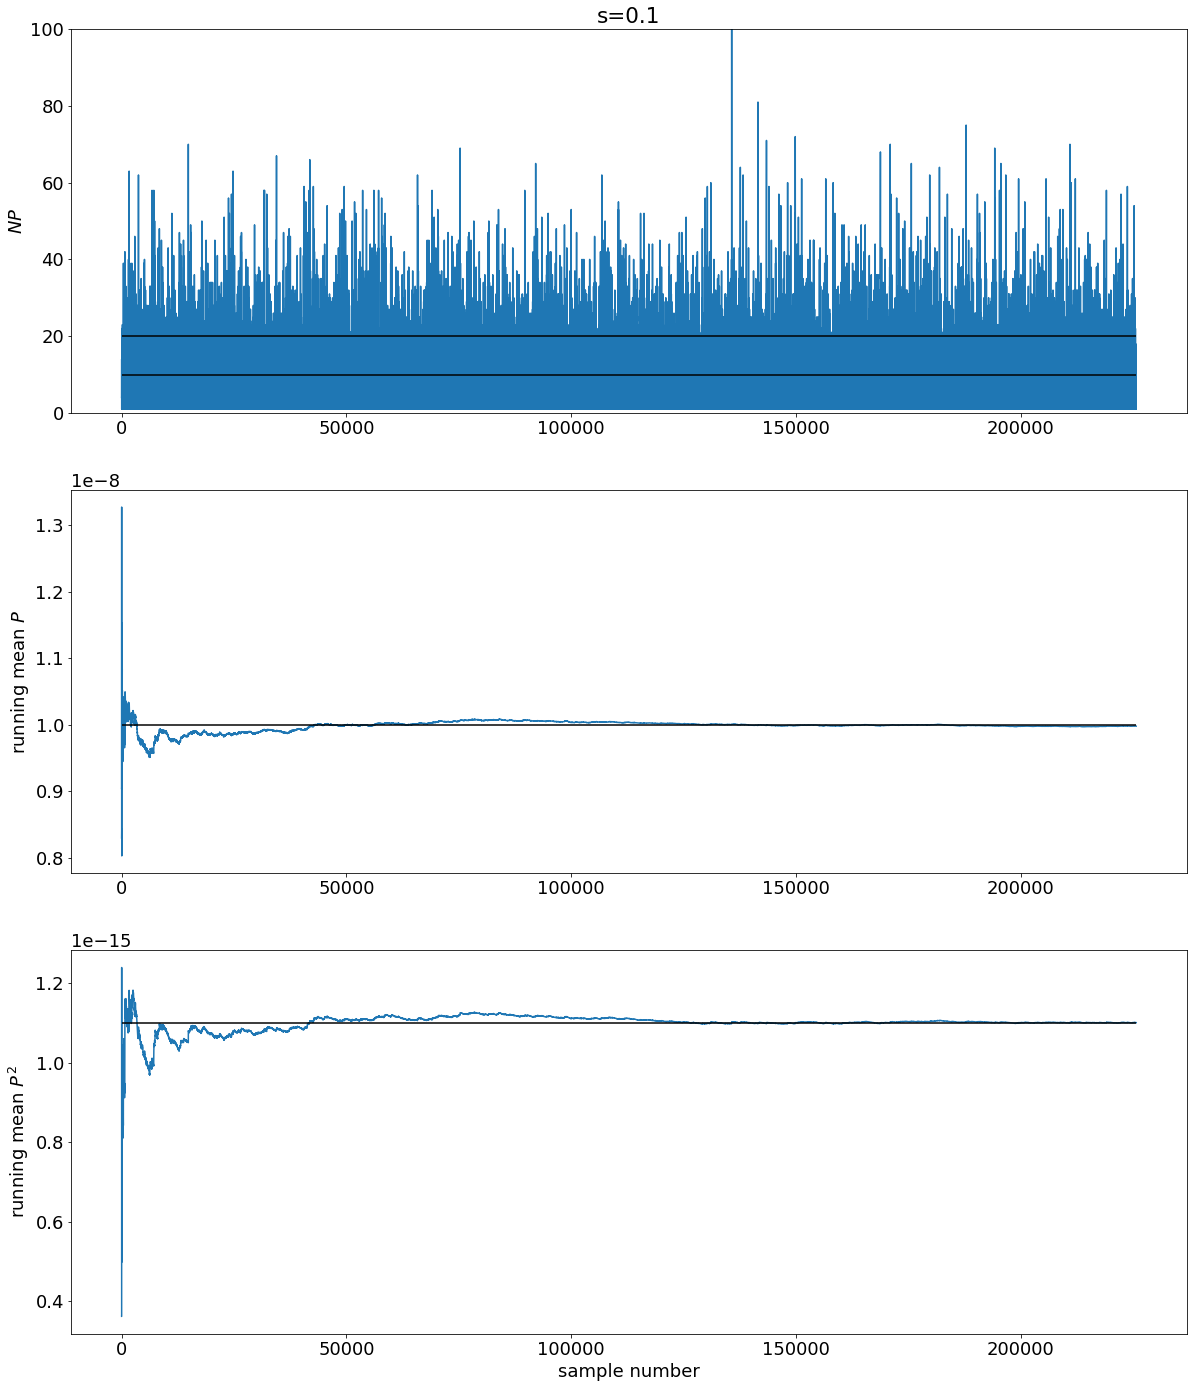

s = 0.01
mu / s = 1.0000000000000001e-07
E[P] = [2.63086716e-07 2.63085523e-07 2.63084330e-07 ... 9.78704275e-08
 9.78702624e-08 9.78700974e-08]


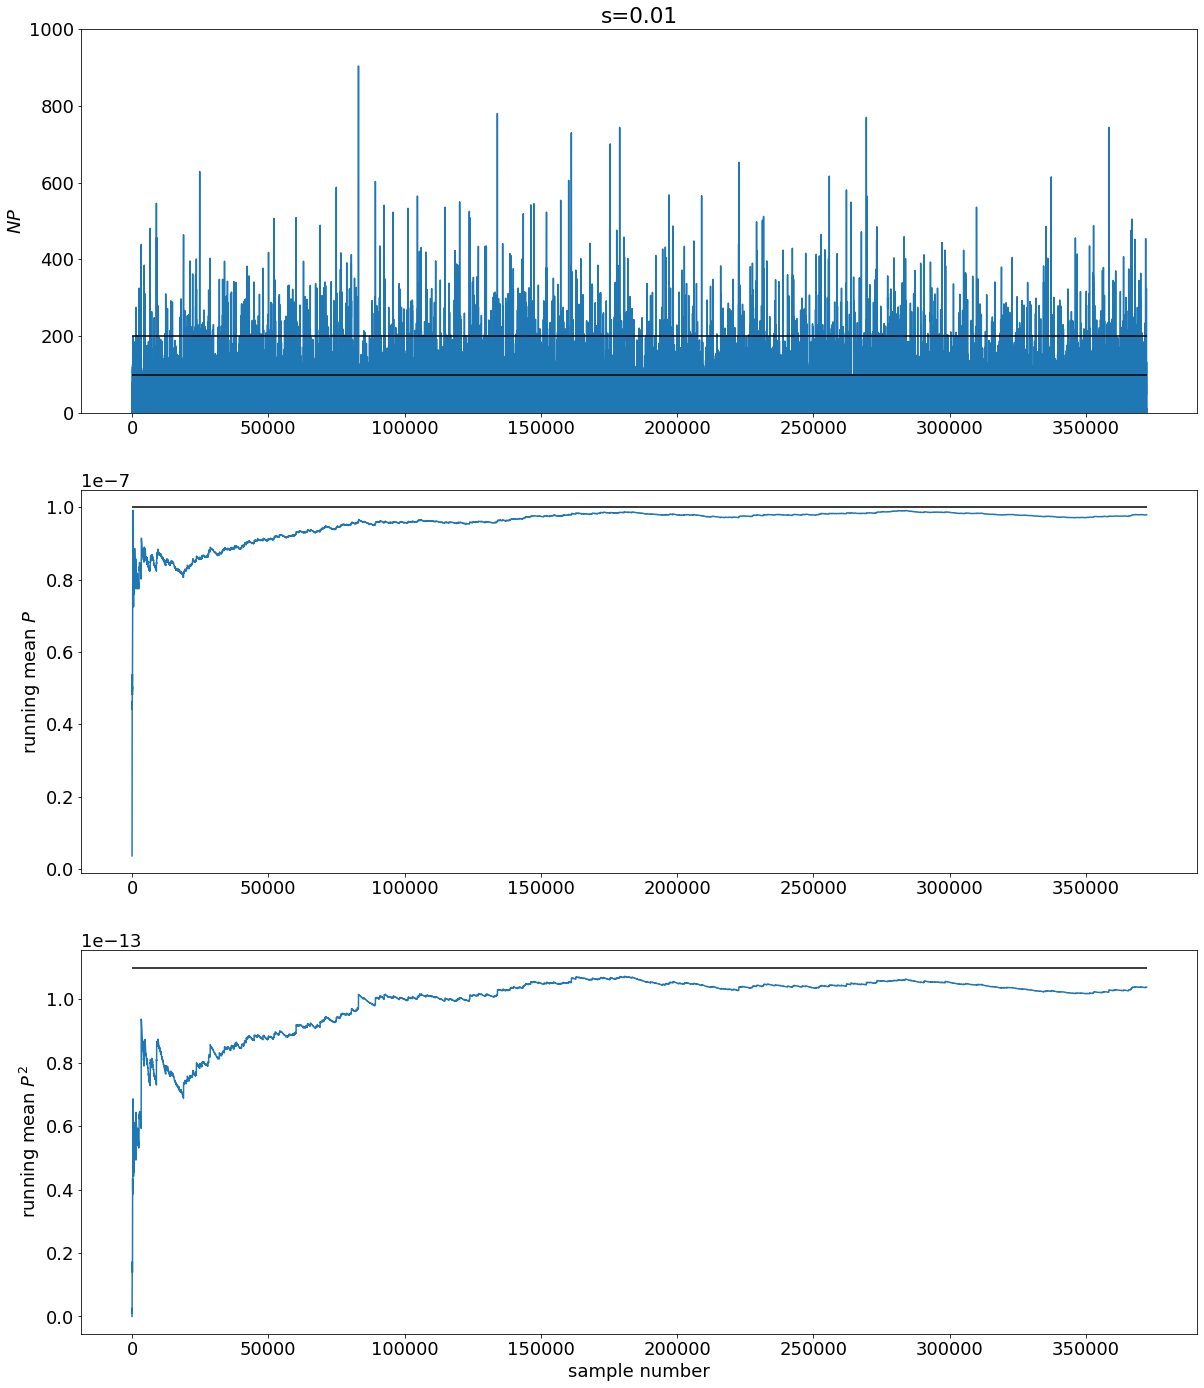

s = 0.001
mu / s = 1e-06
E[P] = [1.86849490e-06 1.86849111e-06 1.86848731e-06 ... 9.30180272e-07
 9.30179331e-07 9.30178390e-07]


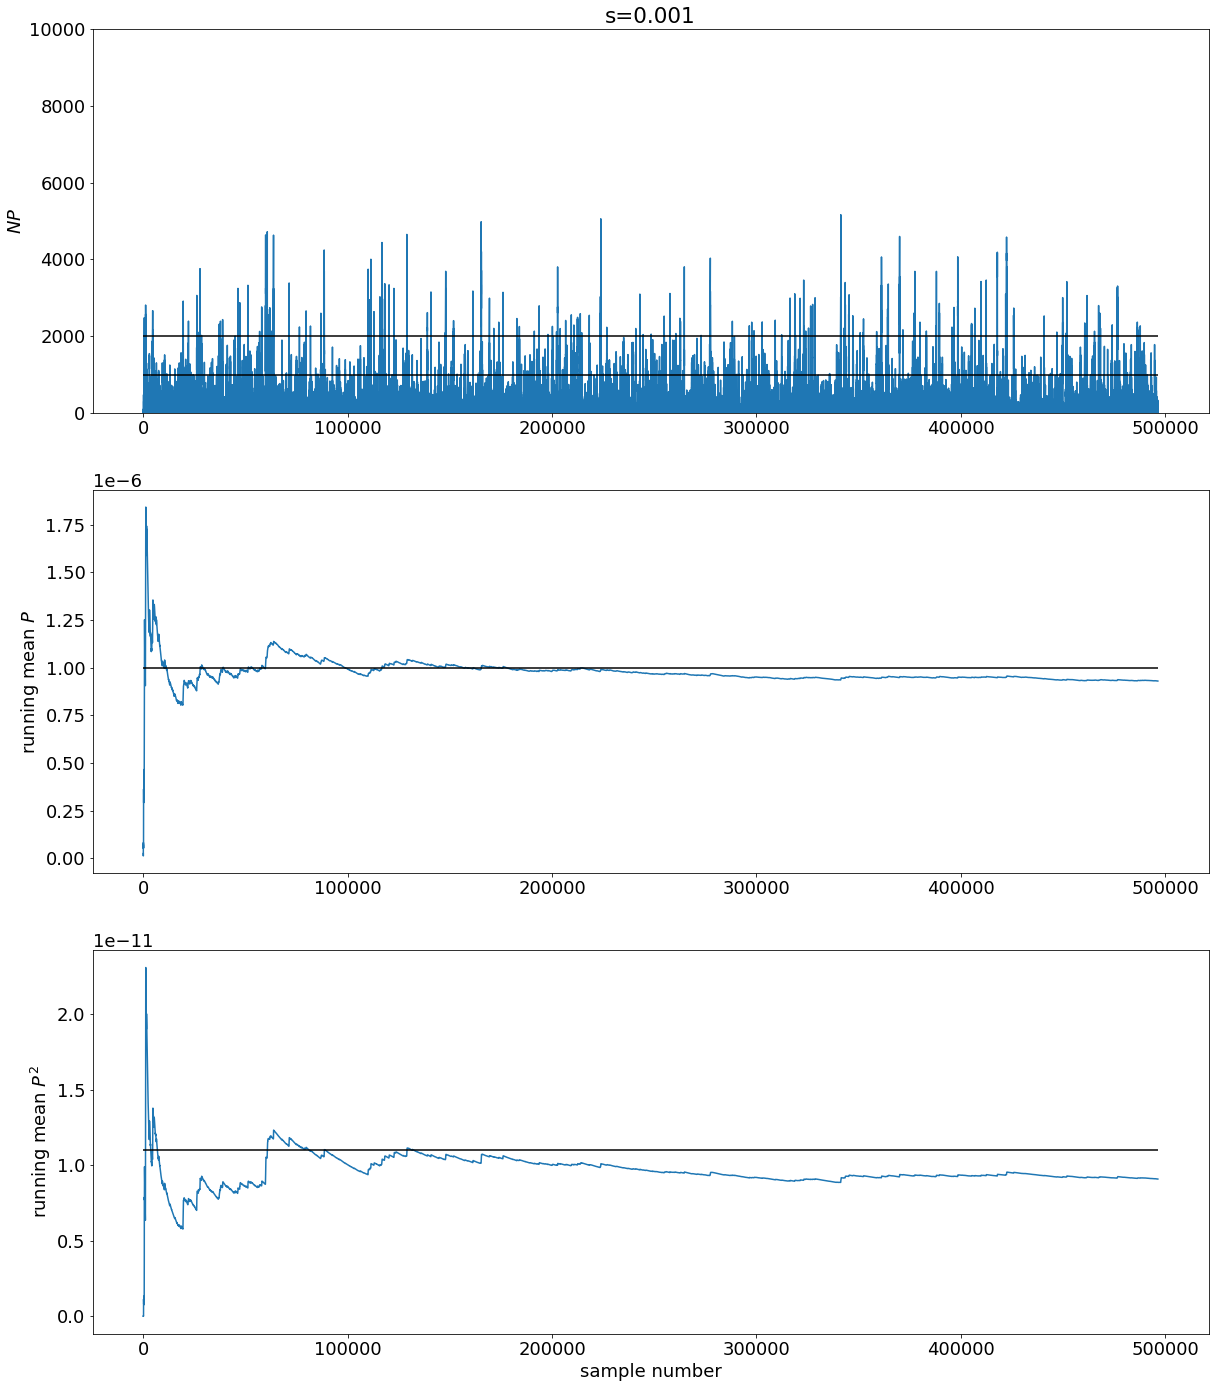

In [10]:
L = 10000
rho = 1
N = rho * L**2
mu = 1e-9
print(f"N mu = {N * mu}")
prefix = "../results/uniform/s{s}_mu{mu}/s{s}_mu{mu}_rho1_L10000_sigma10_time100000.0_r0.1_uniform_{rep}"

for s in [0.1, 0.01, 0.001]:
    for rep in ["all"]:
        pfile = prefix.format(mu=mu, s=s, rho=rho, L=L, rep=rep) + ".p"
        zfile = prefix.format(mu=mu, s=s, rho=rho, L=L, rep=rep) + ".zero"

        ps = np.loadtxt(pfile)
        zeros = np.loadtxt(zfile)
        n_samples = np.arange(1, len(ps) + 1)
        n_zeros = zeros * n_samples / n_samples[-1]

        if rep == "all":
            print(f"s = {s}")
            print(f"mu / s = {mu / s}")
            print(f"E[P] = {np.sum(ps) / (len(ps) + n_zeros)}")

        plt.figure(figsize=(20,24))
        plt.subplot(311)
        plt.plot(N*ps)
        plt.hlines([1 / s, 2 / s], 0, len(ps), color="black")
        plt.ylabel("$NP$")
        plt.ylim([0, 10/s])
        plt.title(f"s={s}")
        plt.subplot(312)
        plt.plot(np.cumsum(ps) / (n_samples + n_zeros))
        plt.hlines(mu / s, 0, n_samples[-1], color="black")
        plt.ylabel("running mean $P$")
        plt.subplot(313)
        plt.plot(np.cumsum(ps**2) / (n_samples + n_zeros))
        plt.hlines(mu / s**2 * (mu + 1 / N), 0, n_samples[-1], color="black")
        plt.ylabel("running mean $P^2$")
        plt.xlabel("sample number")
        plt.show()
        # plt.savefig(f"example_plots/example_s{s}_{rep}.png")
        # plt.close()

In [12]:
marker_shapes = ["^",'+','x']
def plot_moments_unif(files_p,filies_zero,title):
    fig,ax = plt.subplots(1,2,figsize=(20,10))
    for j,s in enumerate([0.1, 0.01, 0.001]):
        pfile = prefix.format(mu=mu,s=s,rep='all')+'.p'
        zfile = prefix.format(mu=mu,s=s,rep='all')+'.zero'
        ps = np.loadtxt(pfile)
        zeros = np.loadtxt(zfile)
        n_samples = np.arange(1, len(ps) + 1)
        n_zeros = zeros * n_samples / n_samples[-1]
        mean_sim = np.cumsum(ps) / (n_samples + n_zeros)
        secondmom_sim = np.cumsum(ps**2) / (n_samples + n_zeros)
        theory_EP = mu/s
        theory_EP2 = mu / s**2 * (mu + 1 / N)
        ax[0].scatter(theory_EP,mean_sim[-1],marker=marker_shapes[j],label=f"s={s}",s=200,color='blue')
        ax[1].scatter(theory_EP2,secondmom_sim[-1],marker=marker_shapes[j],label=f"s={s}",s=200,color='blue')

    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].plot(np.logspace(-8,-6),np.logspace(-8,-6),color='black')
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].plot(np.logspace(-15,-11),np.logspace(-15,-11),color='black')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(r"$\mathbb{E}[P]$")
    ax[1].set_title(r"$\mathbb{E}[P^2]$")
    ax[0].set_xlabel("theory")
    ax[1].set_xlabel("theory")
    ax[0].set_ylabel('sim')
    ax[1].set_ylabel('sim')
    plt.suptitle(title)
    plt.show()

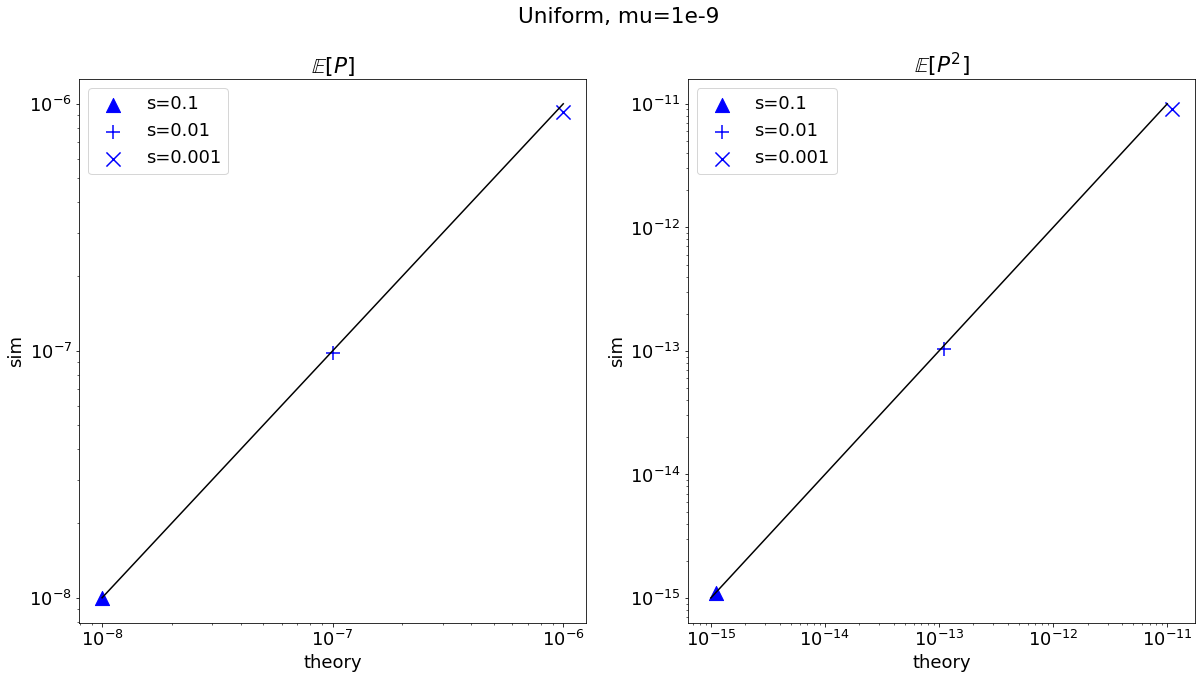

In [13]:
plot_moments_unif(unif_files_p,unif_files_z,"Uniform, mu=1e-9")

## Check convergence: Gaussian

In [27]:
def get_lc_squared(sigma,s):
    return sigma**2/s

def get_EPsquared(mu,s,rho,sigma,u2):
    lcs = get_lc_squared(sigma,s)
    return (2*mu/(s**2*rho*lcs))*u2+mu**2/s**2
    # return (mu/s)**2 +((mu)/((s**2)*rho*lcs))*u2

def u2_exact(w):
    return (-1*np.exp(w**2/(4*np.pi**2))/(8*np.pi))*expi(-1*w**2/(4*np.pi**2))

# def u2_exact(w):
    # return (-1*np.exp(np.float128(w**2)/(4*np.pi**2))/(8*np.pi))*expi(-1*w**2/(4*np.pi**2))

s = 0.1
mu / s = 1e-08
E[P] = [3.72085850e-08 3.72080168e-08 3.72074486e-08 ... 8.38353137e-09
 8.38350252e-09 8.38347367e-09]
E[P^2] = [3.32290942e-11 3.32285868e-11 3.32280793e-11 ... 7.48690534e-12
 7.48687958e-12 7.48685382e-12]
4.311008077165365e-11


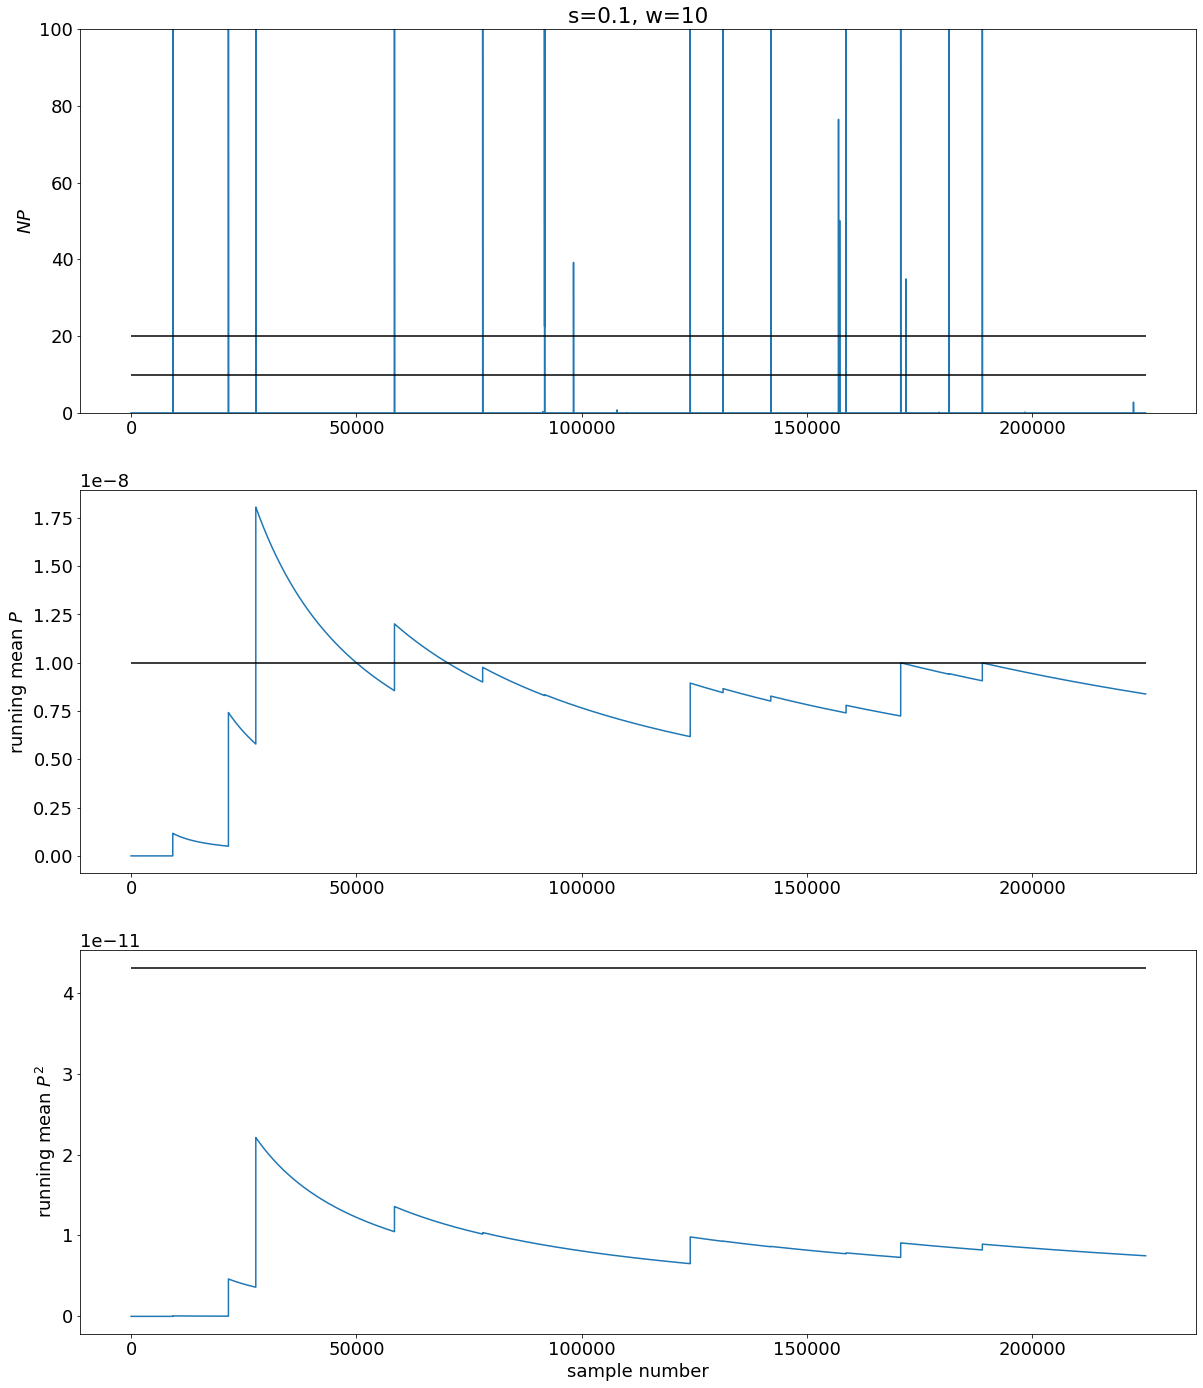

s = 0.1
mu / s = 1e-08
E[P] = [4.02588452e-08 4.02582355e-08 4.02576258e-08 ... 9.10351121e-09
 9.10348003e-09 9.10344886e-09]
E[P^2] = [2.64830586e-12 2.64826575e-12 2.64822564e-12 ... 5.98846835e-13
 5.98844785e-13 5.98842734e-13]
1.0601208537284634e-11


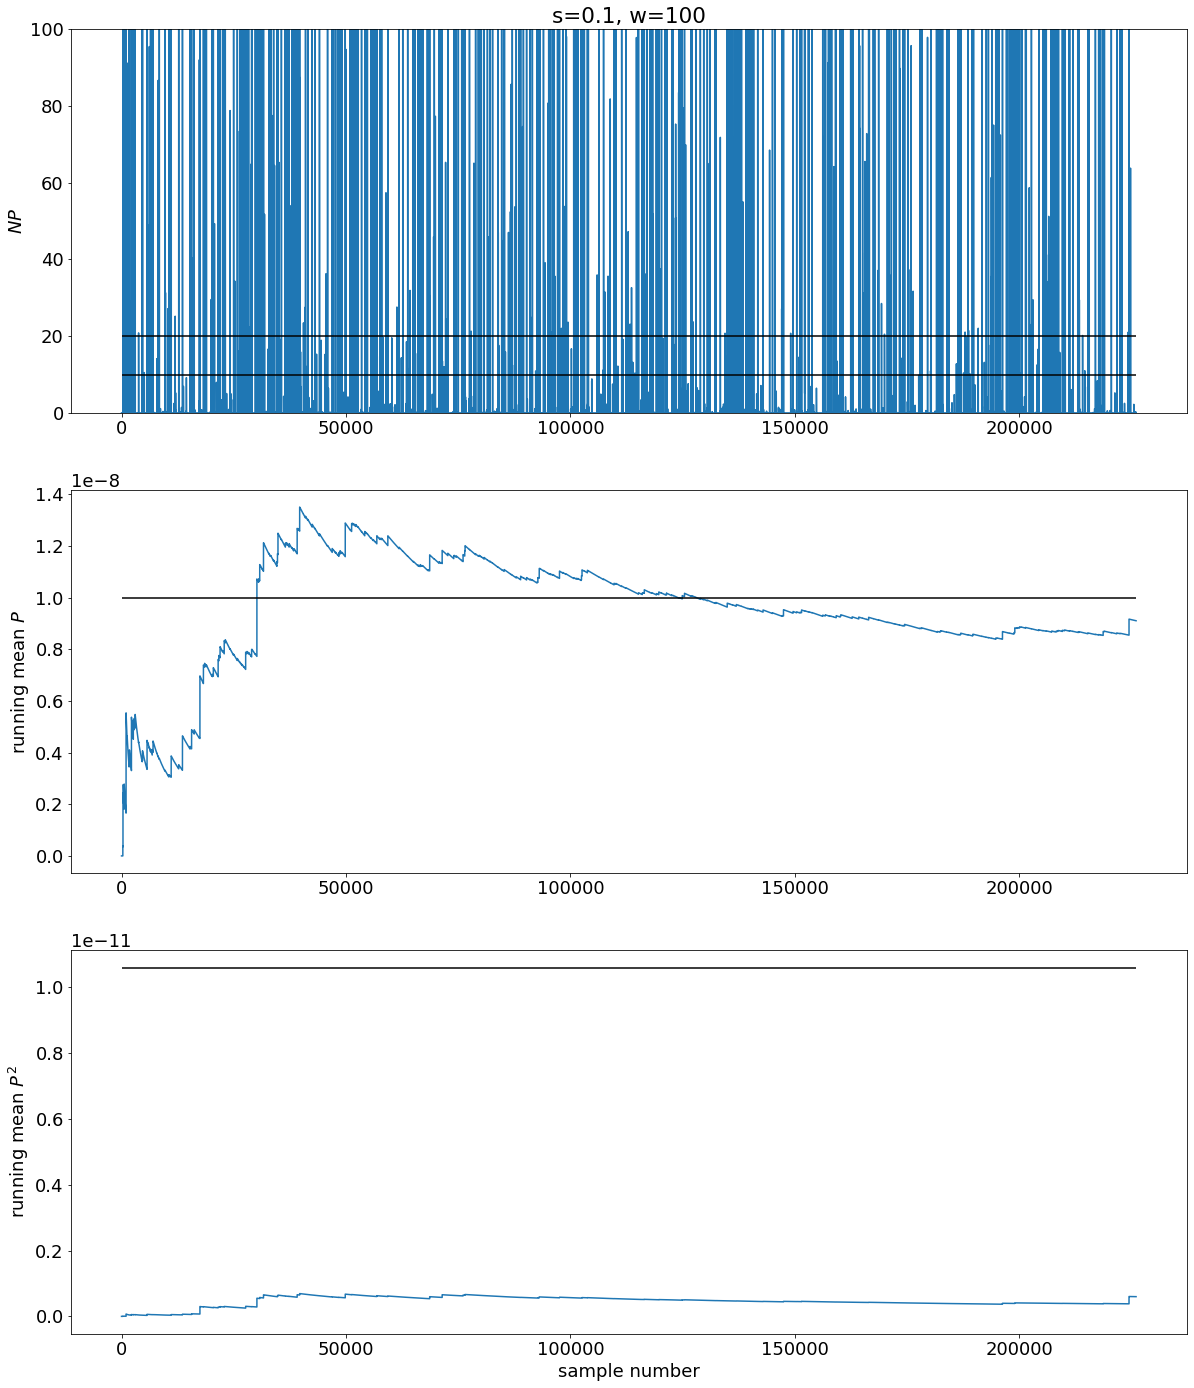

s = 0.1
mu / s = 1e-08
E[P] = [4.35488807e-08 4.35482175e-08 4.35475544e-08 ... 9.82719804e-09
 9.82716427e-09 9.82713050e-09]
E[P^2] = [3.46676733e-14 3.46671453e-14 3.46666174e-14 ... 7.82307341e-15
 7.82304652e-15 7.82301964e-15]
3.0273541318594074e-13


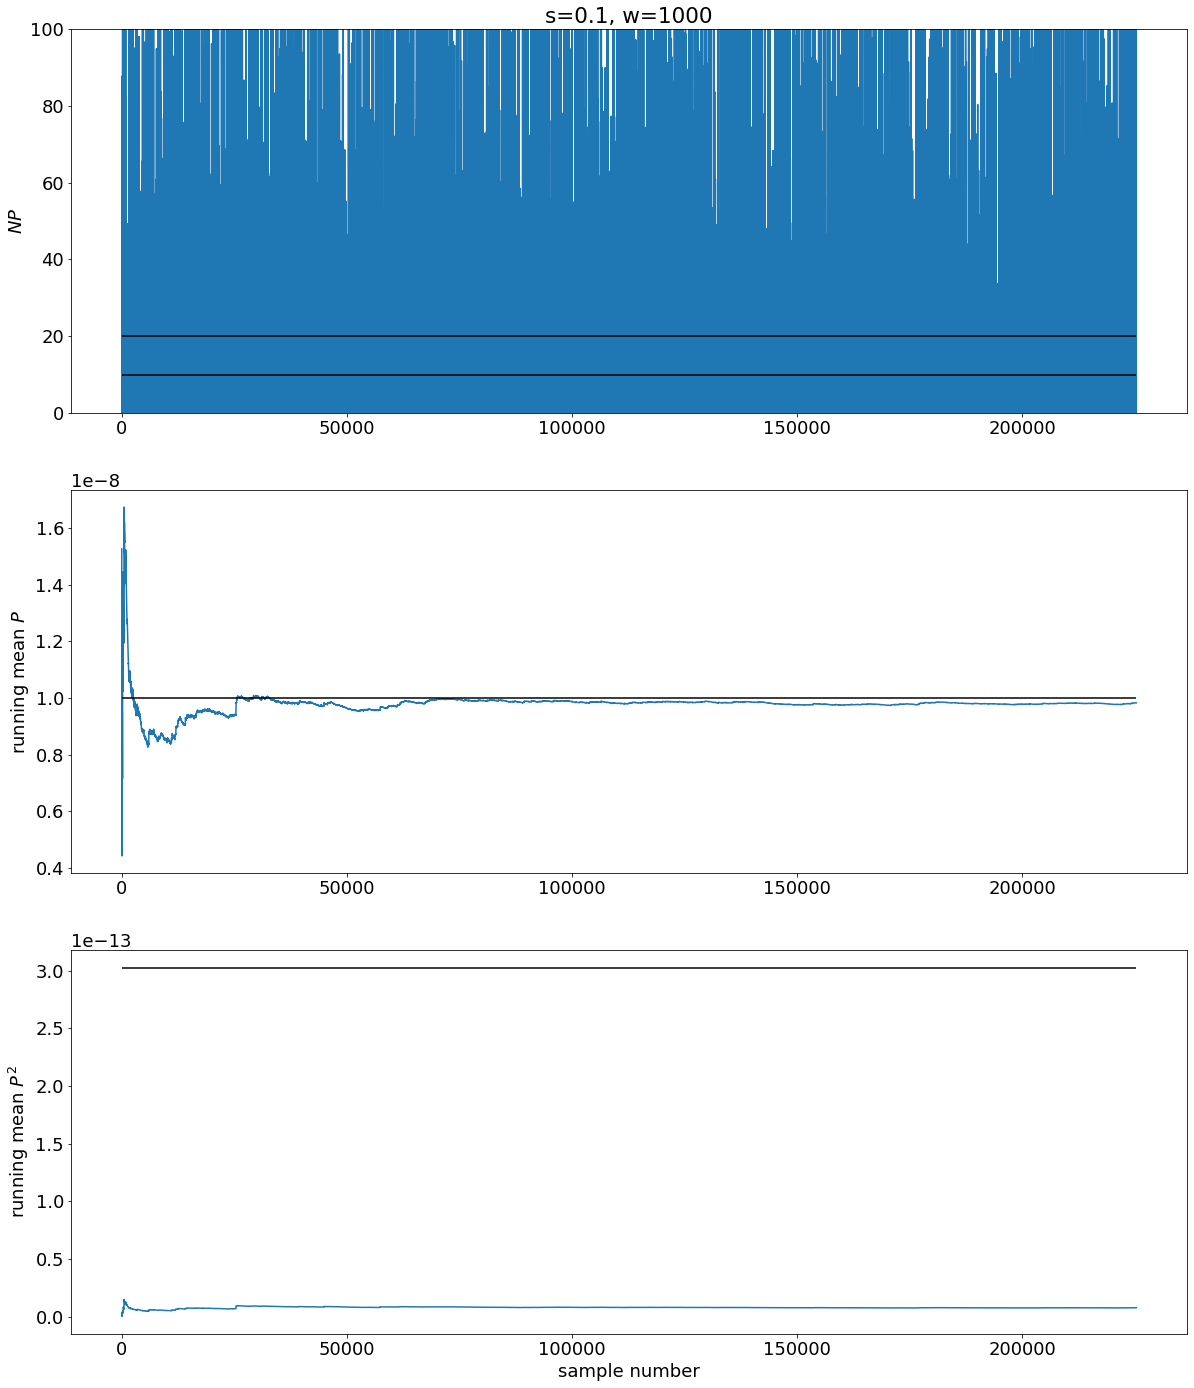

s = 0.01
mu / s = 1.0000000000000001e-07
E[P] = [1.22210151e-07 1.22209592e-07 1.22209032e-07 ... 4.52885803e-08
 4.52885035e-08 4.52884266e-08]
E[P^2] = [4.66991212e-10 4.66989073e-10 4.66986935e-10 ... 1.73057383e-10
 1.73057090e-10 1.73056796e-10]
6.132271221775835e-10


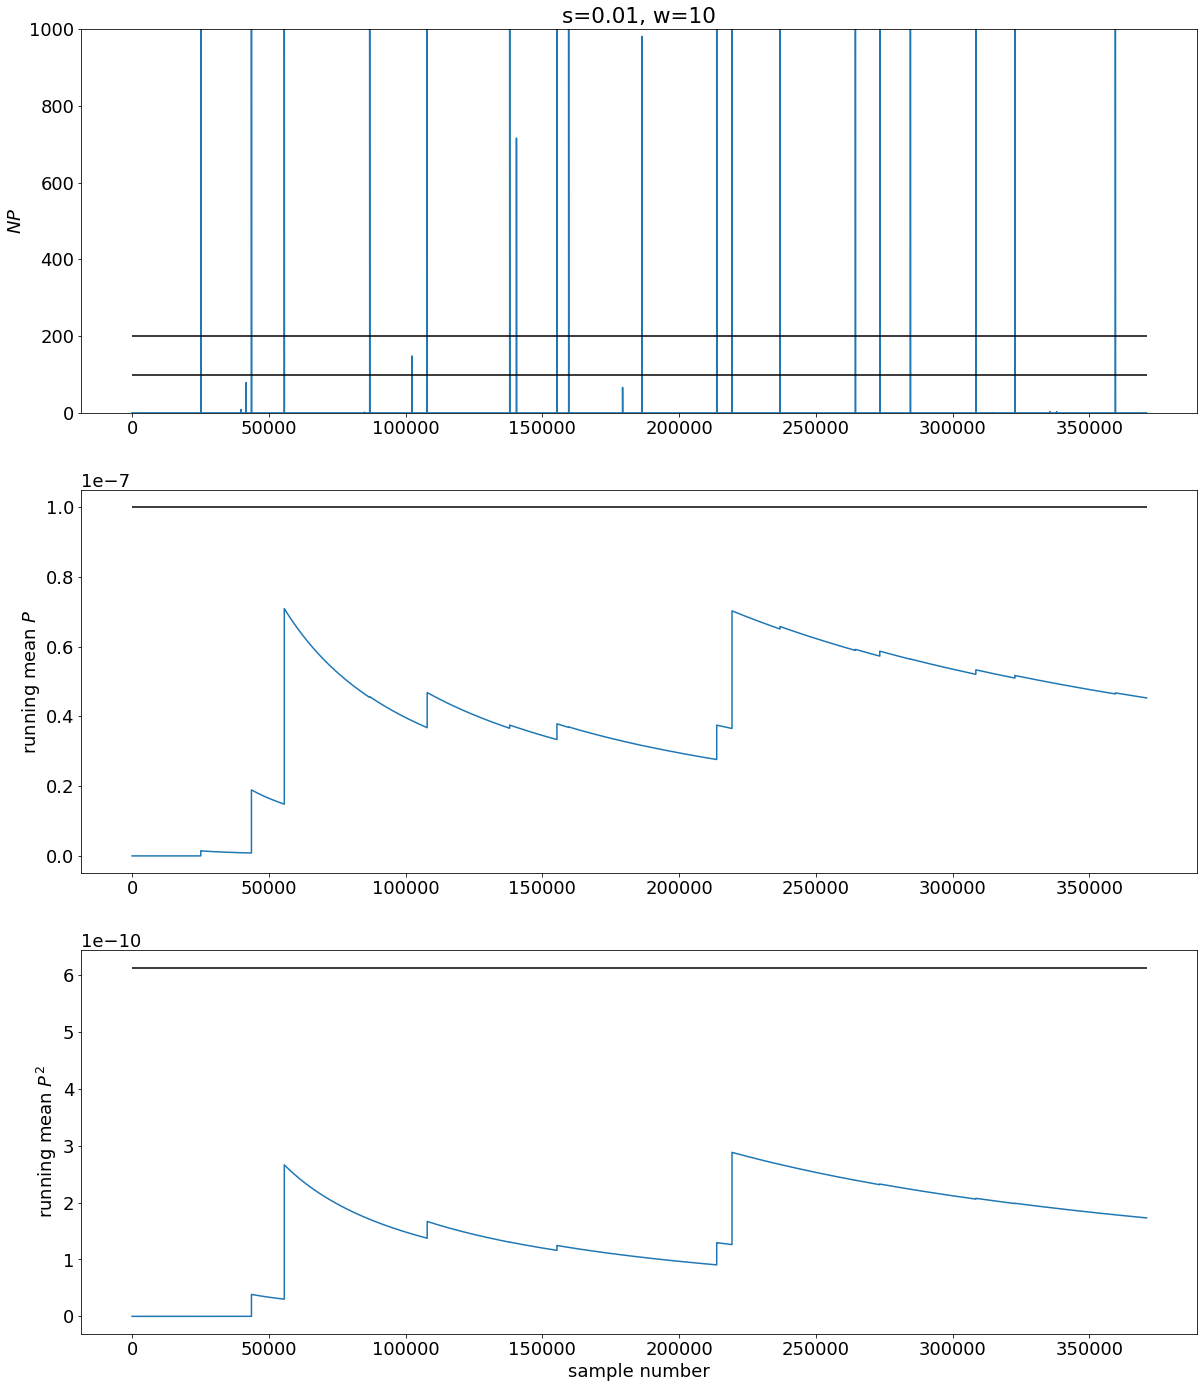

s = 0.01
mu / s = 1.0000000000000001e-07
E[P] = [3.13054118e-07 3.13052708e-07 3.13051298e-07 ... 1.16822099e-07
 1.16821902e-07 1.16821706e-07]
E[P^2] = [1.65715867e-10 1.65715120e-10 1.65714374e-10 ... 6.18400276e-11
 6.18399236e-11 6.18398197e-11]
2.549638345705542e-10


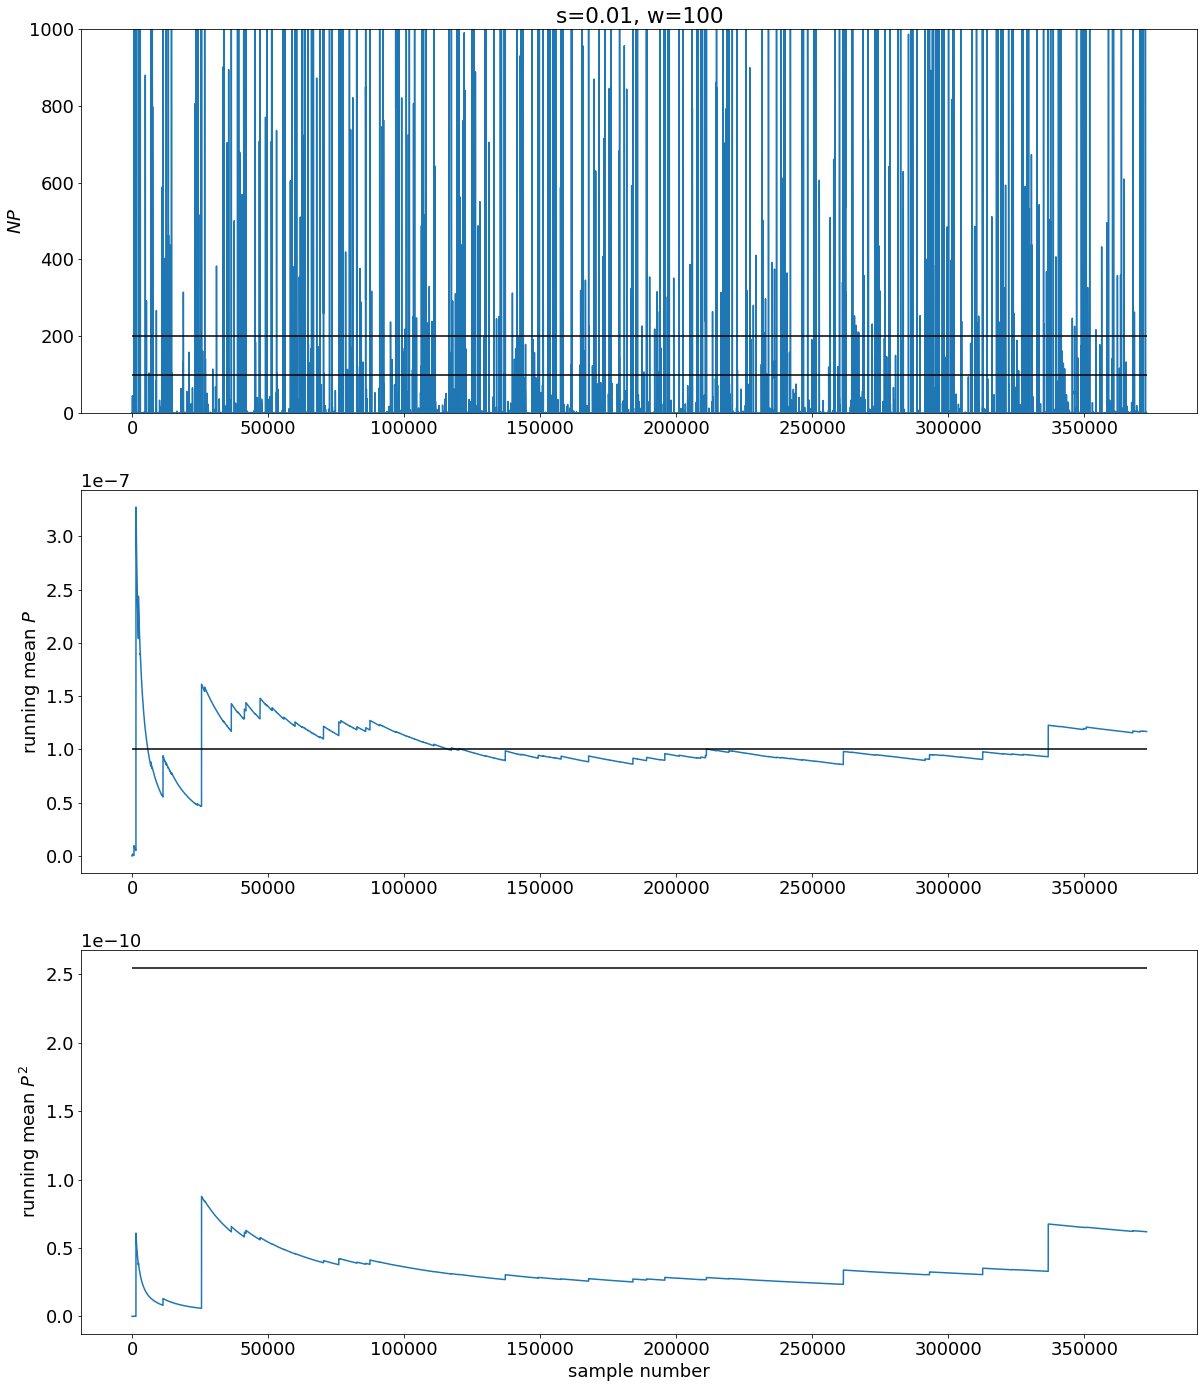

s = 0.01
mu / s = 1.0000000000000001e-07
E[P] = [2.48086463e-07 2.48085344e-07 2.48084225e-07 ... 9.24699742e-08
 9.24698188e-08 9.24696633e-08]
E[P^2] = [1.71271615e-12 1.71270843e-12 1.71270070e-12 ... 6.38385572e-13
 6.38384499e-13 6.38383425e-13]
2.391297187436145e-11


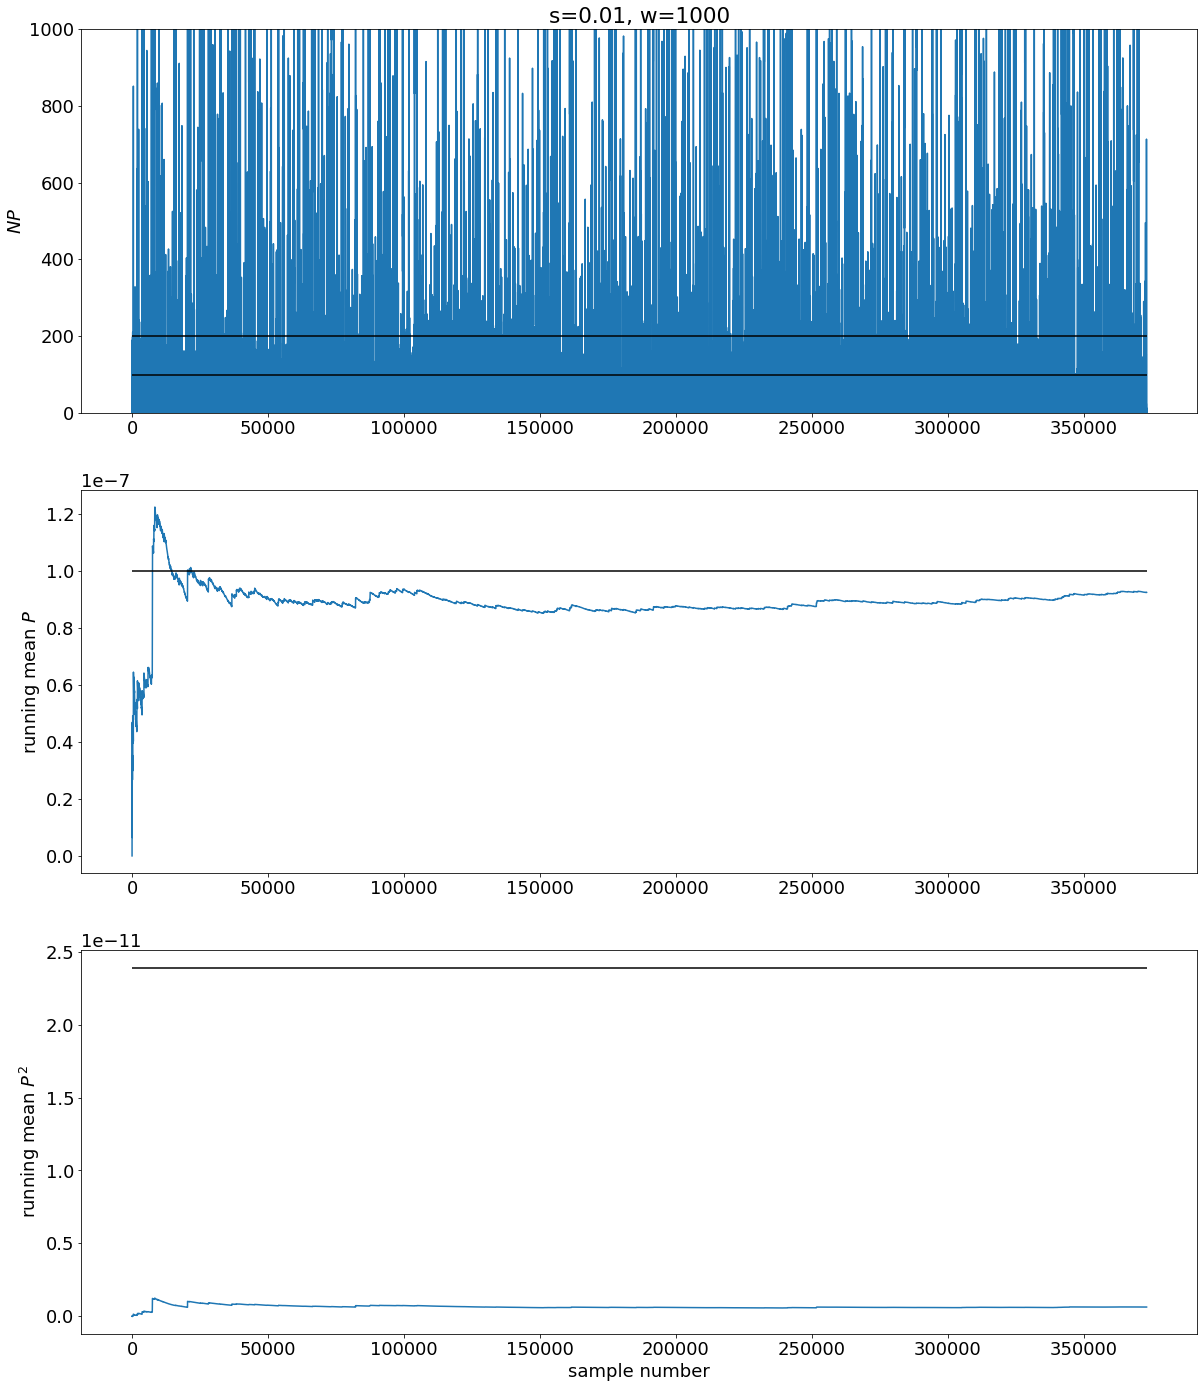

s = 0.001
mu / s = 1e-06
E[P] = [2.68472564e-06 2.68472015e-06 2.68471466e-06 ... 1.33263809e-06
 1.33263674e-06 1.33263539e-06]
E[P^2] = [2.73303916e-08 2.73303357e-08 2.73302798e-08 ... 1.35661985e-08
 1.35661847e-08 1.35661710e-08]
7.963977418343842e-09


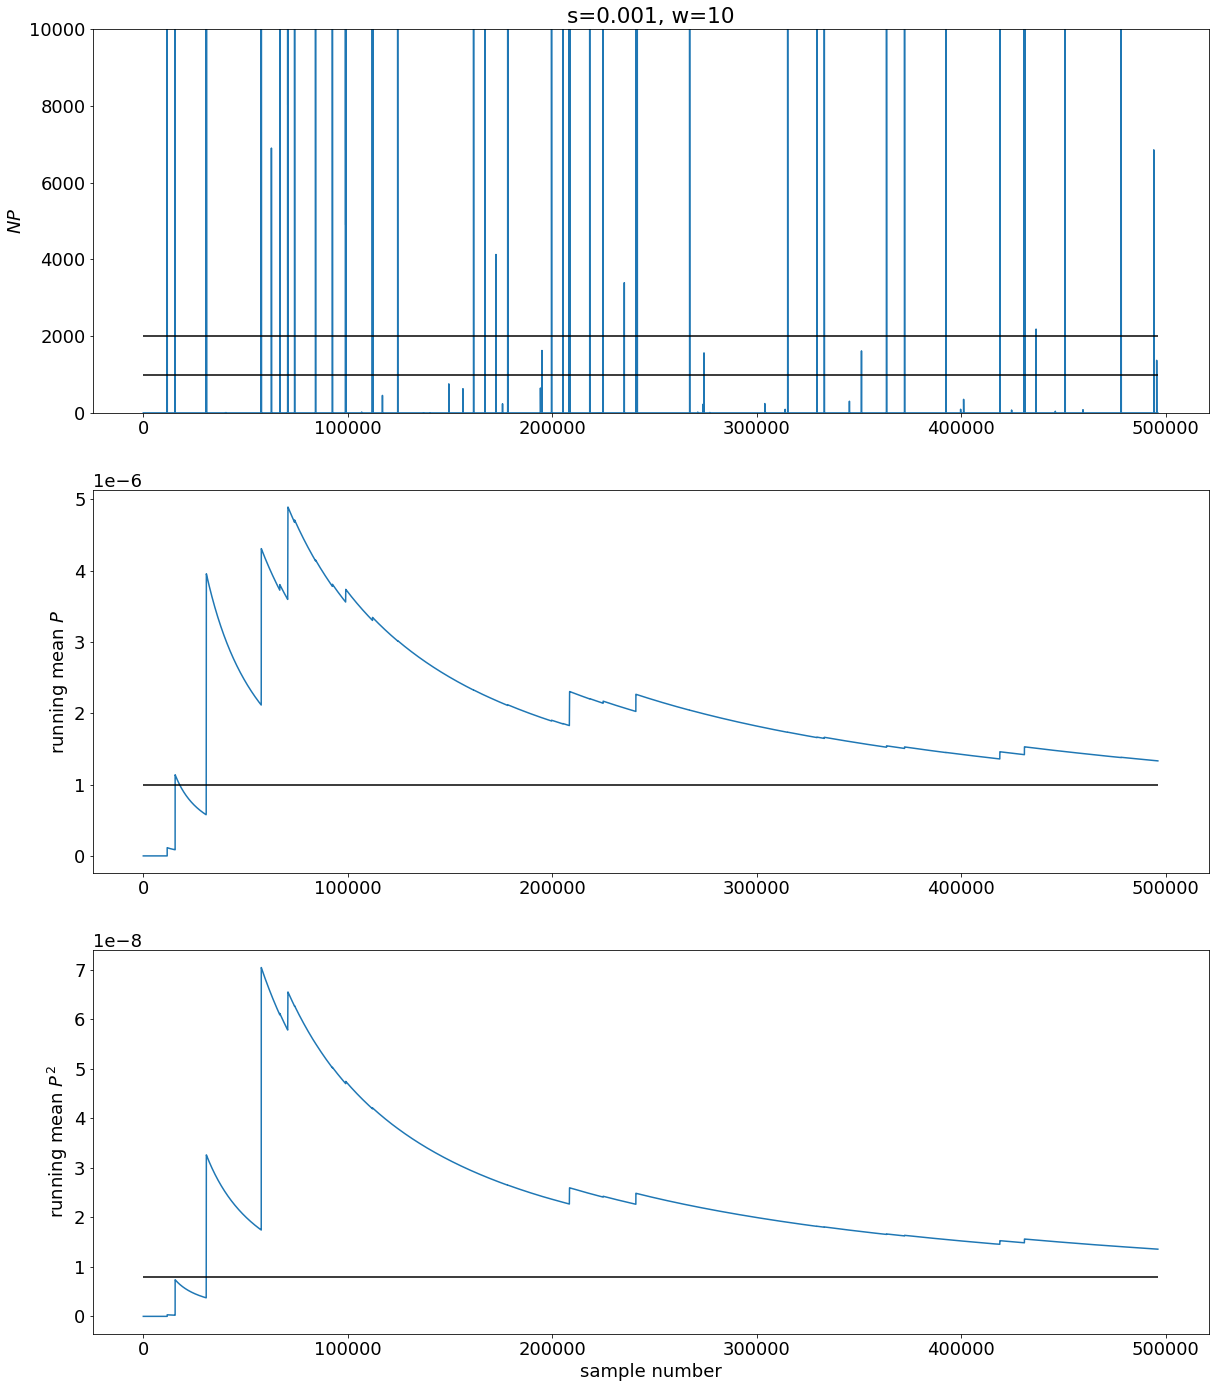

s = 0.001
mu / s = 1e-06
E[P] = [2.24210970e-06 2.24210518e-06 2.24210067e-06 ... 1.11854763e-06
 1.11854651e-06 1.11854538e-06]
E[P^2] = [4.99631995e-09 4.99630989e-09 4.99629982e-09 ... 2.49257289e-09
 2.49257038e-09 2.49256787e-09]
4.311998077165367e-09


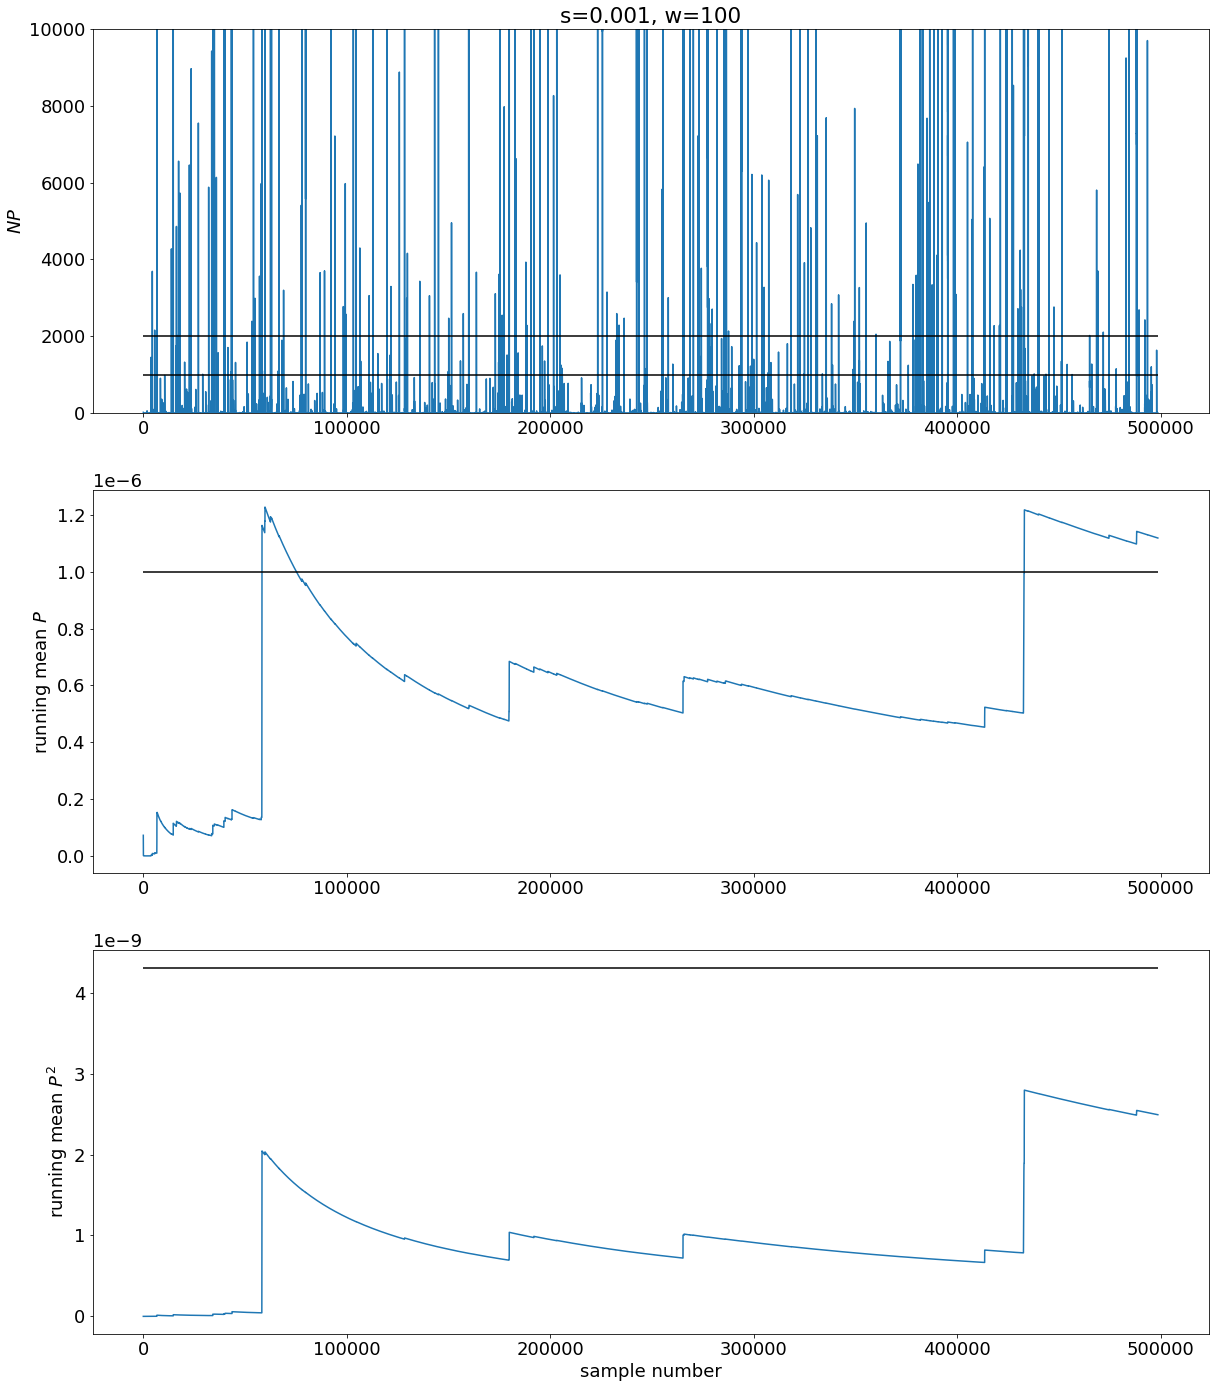

FileNotFoundError: ../results/gaussian_w1000/s0.001_mu1e-09/s0.001_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_gaussian_w1000_all.p not found.

In [29]:
### THINK E[P^2] is wrong here
prefix = "../results/gaussian_w{w}/s{s}_mu{mu}/s{s}_mu{mu}_rho1_L10000_sigma10_time100000.0_r0.1_gaussian_w{w}_{rep}"
w_vals = [10,100,1000]
for s in [0.1, 0.01, 0.001]:
    for rep in ["all"]:#[f"rep{i}" for i in range(10)] + ["all"]:
        for w in w_vals:
            pfile = prefix.format(mu=mu, s=s, rho=rho, L=L, rep=rep, w=w) + ".p"
            zfile = prefix.format(mu=mu, s=s, rho=rho, L=L, rep=rep, w=w) + ".zero"

            ps = np.loadtxt(pfile)
            zeros = np.loadtxt(zfile)
            n_samples = np.arange(1, len(ps) + 1)
            n_zeros = zeros * n_samples / n_samples[-1]

            sigma = 10
            rho = 1
            w_tilde = w/np.sqrt(get_lc_squared(sigma,s))
            theory_u2 = u2_exact(w_tilde)
            theory_EP2 = get_EPsquared(mu,s,rho,sigma,theory_u2) ## FIND BUG HERE
            
            if rep == "all":
                print(f"s = {s}")
                print(f"mu / s = {mu / s}")
                print(f"E[P] = {np.sum(ps) / (len(ps) + n_zeros)}")
                print(f"E[P^2] = {np.sum(ps**2) / (len(ps) + n_zeros)}")
                print(theory_EP2)

            plt.figure(figsize=(20,24))
            plt.subplot(311)
            plt.plot(N*ps)
            plt.hlines([1 / s, 2 / s], 0, len(ps), color="black")
            plt.ylabel("$NP$")
            plt.ylim([0, 10/s])
            plt.title(f"s={s}, w={w}")
            plt.subplot(312)
            plt.plot(np.cumsum(ps) / (n_samples + n_zeros))
            plt.hlines(mu / s, 0, n_samples[-1], color="black")
            plt.ylabel("running mean $P$")
            plt.subplot(313)
            plt.plot(np.cumsum(ps**2) / (n_samples + n_zeros))
            
            
            plt.hlines(theory_EP2, 0, n_samples[-1], color="black")
            plt.ylabel("running mean $P^2$")
            plt.xlabel("sample number")
            plt.show()

In [17]:
ga_files = glob.glob('../results/gaus*/*/*time100000.0*all*')
ga_files_p = glob.glob('../results/gaus*/*/*time100000.0*all.p')
ga_files_z = glob.glob('../results/gaus*/*/*time100000.0*all.zero')

In [18]:
ga_files

['../results/gaussian_w10/s0.01_mu1e-09/s0.01_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_gaussian_w10_all.p',
 '../results/gaussian_w10/s0.01_mu1e-09/s0.01_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_gaussian_w10_all.zero',
 '../results/gaussian_w10/s0.001_mu1e-09/s0.001_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_gaussian_w10_all.p',
 '../results/gaussian_w10/s0.001_mu1e-09/s0.001_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_gaussian_w10_all.zero',
 '../results/gaussian_w10/s0.1_mu1e-09/s0.1_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_gaussian_w10_all.zero',
 '../results/gaussian_w10/s0.1_mu1e-09/s0.1_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_gaussian_w10_all.p',
 '../results/gaussian_w100/s0.01_mu1e-09/s0.01_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_gaussian_w100_all.zero',
 '../results/gaussian_w100/s0.01_mu1e-09/s0.01_mu1e-09_rho1_L10000_sigma10_time100000.0_r0.1_gaussian_w100_all.p',
 '../results/gaussian_w100/s0.001_mu1e-09/s0.001_mu1e-09_rho1_L10000_sigma10_tim

In [30]:
prefix = "../results/gaussian_w{w}/s{s}_mu{mu}/s{s}_mu{mu}_rho1_L10000_sigma10_time100000.0_r0.1_gaussian_w{w}_{rep}"
def plot_moments_gaussian(files_p,filies_zero,title,w_vals = [10,100,1000]):
    fig,ax = plt.subplots(1,2,figsize=(20,10))
    colors = ['red','blue','green']
    color_dict = dict(zip(w_vals,colors))
    for j,s in enumerate([0.1, 0.01, 0.001]):
        for w in w_vals:
            if 'gaussian_w'+str(w) in prefix.format(mu=mu,s=s,w=w,rep='all'): 
                pfile = prefix.format(mu=mu,s=s,w=w,rep='all')+'.p'
                zfile = prefix.format(mu=mu,s=s,w=w,rep='all')+'.zero'
                if os.path.isfile(pfile):
                    ps = np.loadtxt(pfile)
                    zeros = np.loadtxt(zfile)
                    n_samples = np.arange(1, len(ps) + 1)
                    n_zeros = zeros * n_samples / n_samples[-1]
                    mean_sim = np.cumsum(ps) / (n_samples + n_zeros)
                    secondmom_sim = np.cumsum(ps**2) / (n_samples + n_zeros)
                    theory_EP = mu/s
                    sigma = 10
                    rho = 1
                    w_tilde = w/np.sqrt(get_lc_squared(sigma,s))
                    theory_u2 = u2_exact(w_tilde)
                    theory_EP2 = get_EPsquared(mu,s,rho,sigma,theory_u2)
                    ax[0].scatter(theory_EP,mean_sim[-1],marker=marker_shapes[j],label=f"s={s}, w={w}",s=200,color=color_dict[w])
                    ax[1].scatter(theory_EP2,secondmom_sim[-1],marker=marker_shapes[j],label=f"s={s}, w={w}",s=200,color=color_dict[w])

    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    ax[0].plot(np.logspace(-8,-6),np.logspace(-8,-6),color='black')
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')
    ax[1].plot(np.logspace(-14,-6),np.logspace(-14,-6),color='black')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(r"$\mathbb{E}[P]$")
    ax[1].set_title(r"$\mathbb{E}[P^2]$")
    ax[0].set_xlabel("theory")
    ax[1].set_xlabel("theory")
    ax[0].set_ylabel('sim')
    ax[1].set_ylabel('sim')
    plt.suptitle(title)
    plt.show()

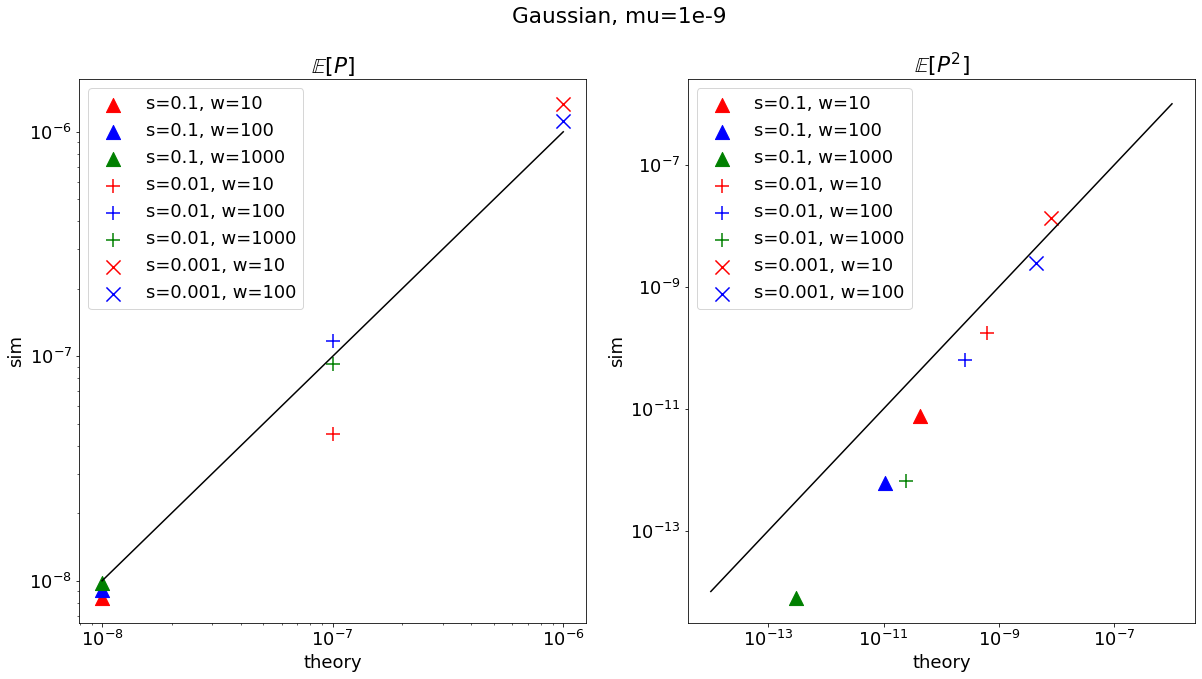

In [31]:
plot_moments_gaussian(ga_files_p,ga_files_z,"Gaussian, mu=1e-9")
### THINK E[P^2] is wrong here